# Radiation tests data analysis

16/11/2023:

Data analysis from the radiation test done at Franhoffer Institute in Germany. 

In [ ]:
#%history -g -f histo_nb 

Import the needed modules

In [1]:
#%matplotlib notebook
%matplotlib inline
import bz2, os, time
from os import path
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
from scipy.optimize import curve_fit
import matplotlib.dates as mdate
import pandas as pd
import seaborn as sns
from pathlib import Path
#from my_funcs import getfiles, natural_sort_key, cumsum_sma

sns.set_context("talk")

PLOT_DIR = Path("./plots")
PLOT_DIR.mkdir(exist_ok=True)

NOISE_DIR = Path("./data/Oszi/")
NOISE_DIR.mkdir(exist_ok=True)

B1500A_DIR = Path("./data/B1500A/")
B1500A_DIR.mkdir(exist_ok=True)

### 1.- B1500A data analysis

In [2]:
dirs = [d[0] for d in sorted(os.walk('./data/B1500A/'))]
dirs = dirs[1:]
#print(dirs)

# 01 Mirror

['Mirror [step0_2(1) ; 24_10_2023 13_45_15].csv', 'Mirror [step1_2(1) ; 01_11_2023 08_48_42].csv', 'Mirror [step2_2(1) ; 08_11_2023 09_16_20].csv', 'Mirror [step3_2(1) ; 15_11_2023 09_37_41].csv', 'Mirror [step4_2(1) ; 17_11_2023 13_24_31].csv', 'Mirror [step7_2(1) ; 26_11_2023 13_52_05].csv']


/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/s

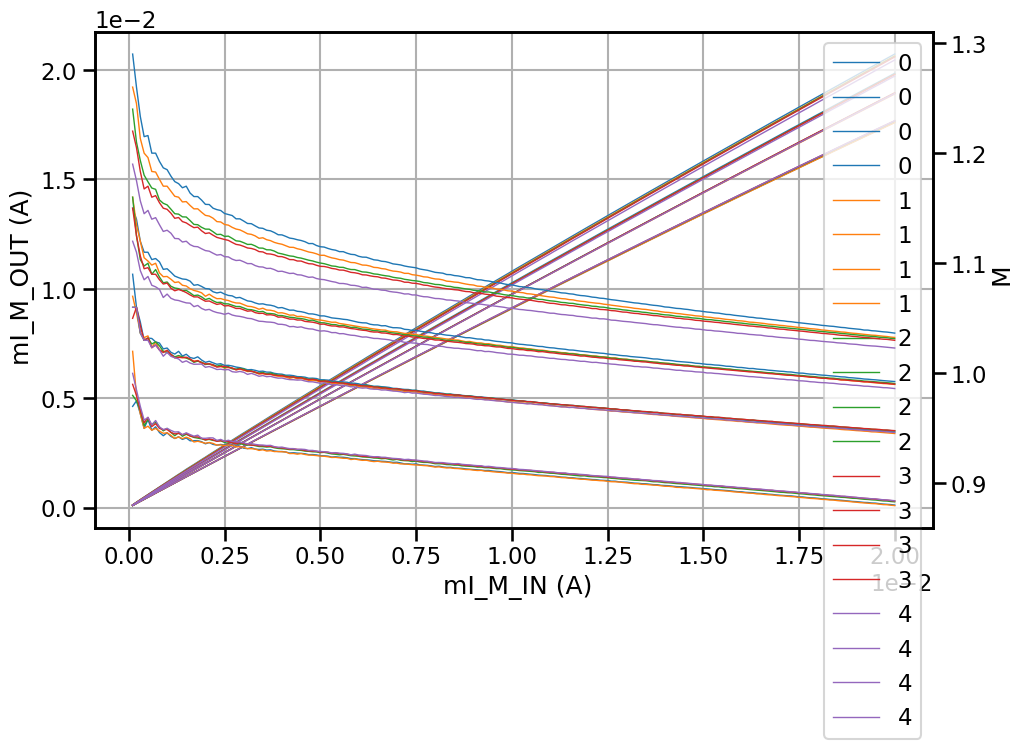

In [3]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board= 2 #can be 0 to 5
step = 0
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"Mirror [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)
#print(files)
#print(dirs)
#files=[files[step]]
print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    #print(d)
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[217])
        m_out=np.array_split(df[' mI_M_OUT'], 4)
        m_in=np.array_split(df[' mI_M_IN'], 4)
        m=np.array_split(df[' M'], 4)
    else:
        continue
    
    for i in range(len(m_in)):
        ax1.plot(m_in[i],m_out[i],lw=1.0,c=colors[d],label=f'{d}')
        ax2.plot(m_in[i],m[i],lw=1.0,c=colors[d])
        ax1.legend()
        
ax1.set_xlabel(f'{df.columns[8]} (A)')
ax1.set_ylabel(f'{df.columns[6]} (A)')#, color=color)   
ax2.set_ylabel(df.columns[5])#, color=color)  # we already handled the x-label with ax1
plt.show()

# 02 NPN1 GP

/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/s

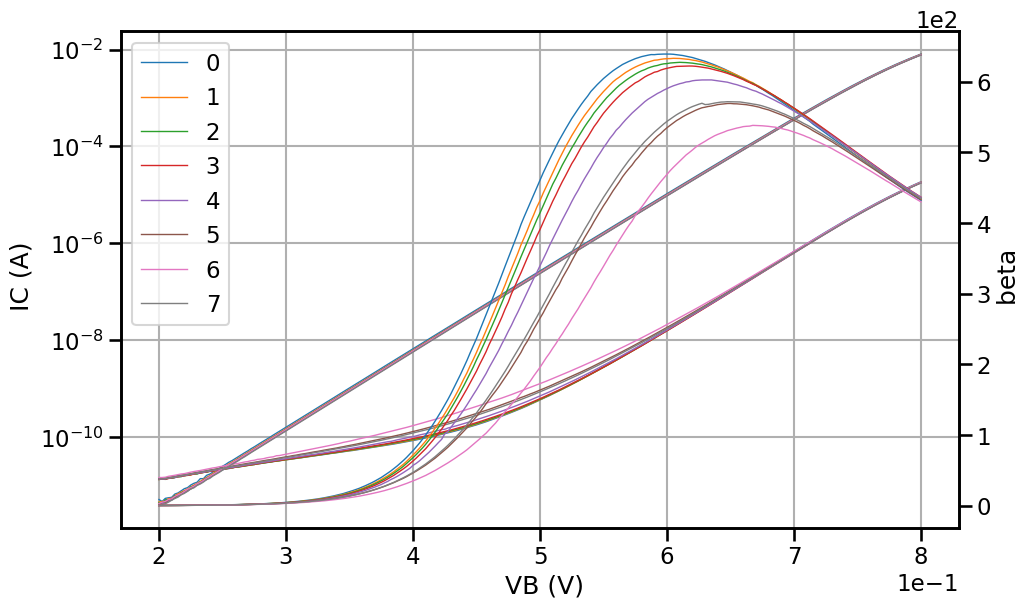

In [4]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=5 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NPN1 GP [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[218])#  
        vb=np.array_split(df[' VB'], 1)
        ic=np.array_split(df[' IC'], 1)
        ib=np.array_split(df[' IB'], 1)
        beta=np.array_split(df[' beta'], 1)
    else:
        continue
    
    for r in range(len(vb)):
        #ax1.semilogy(vb[r],ic[r],lw=0.9,c=colors[i],marker=markers[i])
        ax1.semilogy(vb[r],ic[r],lw=1.0,c=colors[d],label=f'{d}')
        ax1.semilogy(vb[r],ib[r],lw=1.0,c=colors[d])
        ax1.legend()
        ax2.plot(vb[r],beta[r],lw=1.0,c=colors[d])
        
ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[3]} (A)') 
ax2.set_ylabel(df.columns[4])
plt.show()

# 03 NPN1 IC VCE

/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/s

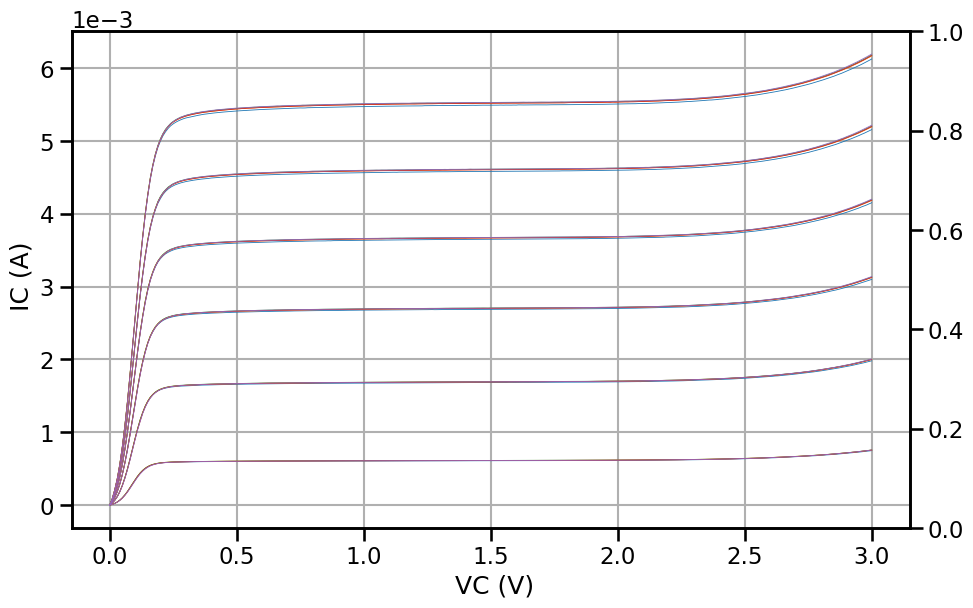

In [5]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=2 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NPN1 IC VCE [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)
#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[214])#        df=pd.read_csv(dirs[i] +'/'+ files[serie::6][i],header=[214])
        vc=np.array_split(df[' VC'], 6)
        ic=np.array_split(df[' IC'], 6)
    else:
        continue
        
    for r in range(len(vc)):
        ax1.plot(vc[r],ic[r],lw=0.6,c=colors[d],label=f'{d}')
        #ax1.legend()
        #ax2.plot(vb[i],beta[i],lw=0.4,c=colors[i])
        
ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[2]} (A)')#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 04 NPN2 GP

/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/s

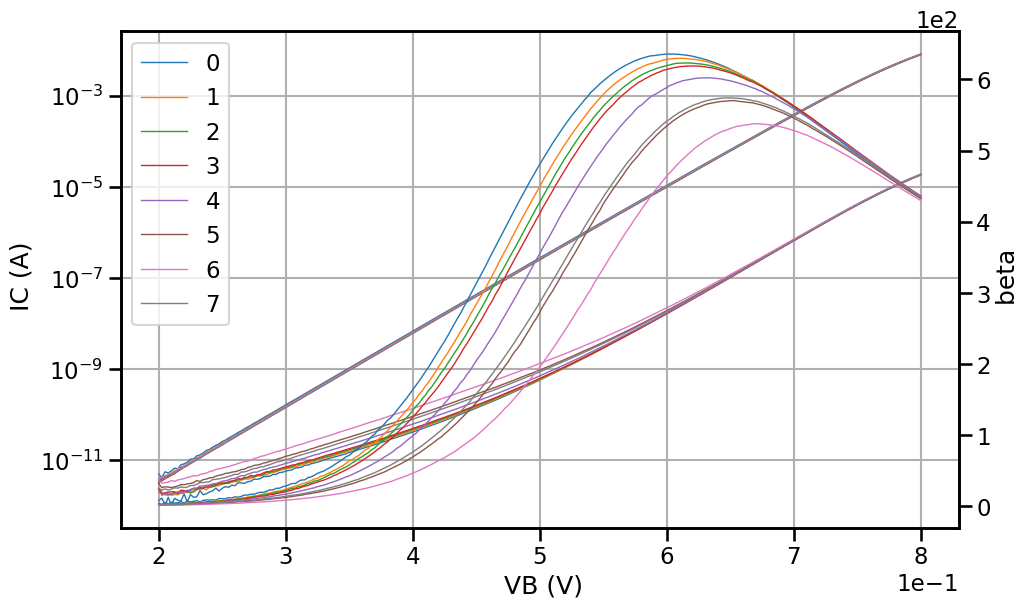

In [6]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=5 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NPN2 GP [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[218])#  
        vb=np.array_split(df[' VB'], 1)
        ic=np.array_split(df[' IC'], 1)
        ib=np.array_split(df[' IB'], 1)
        beta=np.array_split(df[' beta'], 1)
    else:
        continue
    
    for r in range(len(vb)):
        #ax1.semilogy(vb[r],ic[r],lw=0.9,c=colors[i],marker=markers[i])
        ax1.semilogy(vb[r],ic[r],lw=1.0,c=colors[d],label=f'{d}')
        ax1.semilogy(vb[r],ib[r],lw=1.0,c=colors[d])
        ax1.legend()
        ax2.plot(vb[r],beta[r],lw=1.0,c=colors[d])
        
ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[3]} (A)')#, color=color)   
ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 05 NPN2 IC VCE

/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/s

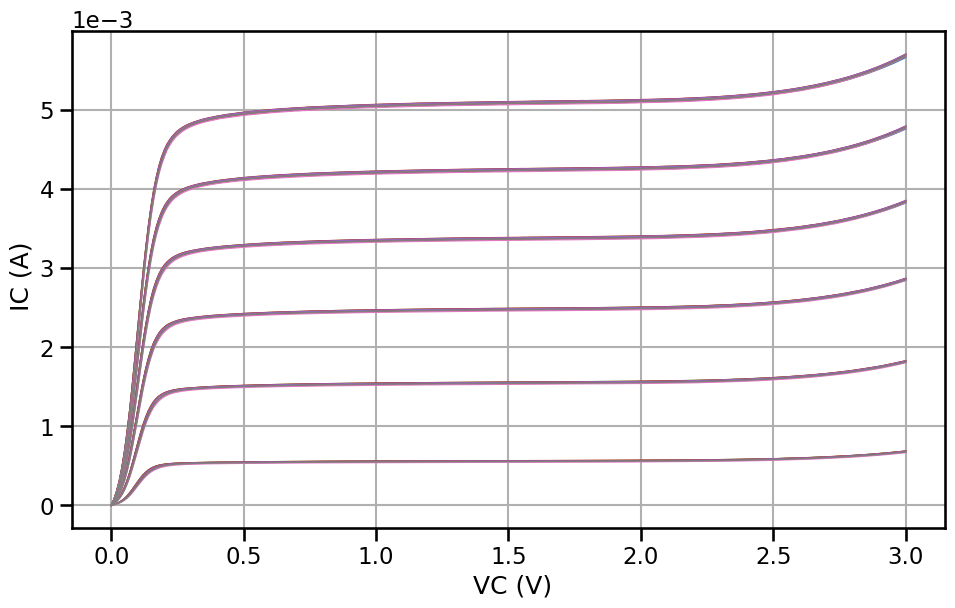

In [7]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))

fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NPN2 IC VCE [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[214])#  
        vc=np.array_split(df[' VC'], 6)
        ic=np.array_split(df[' IC'], 6)
    else:
        continue
        
    for r in range(len(vc)):
        ax1.plot(vc[r],ic[r],lw=1.0,c=colors[d],label=f'{d}')
        #ax1.legend()
                
ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[2]} (A)')#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 06 PNP GP

/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/s

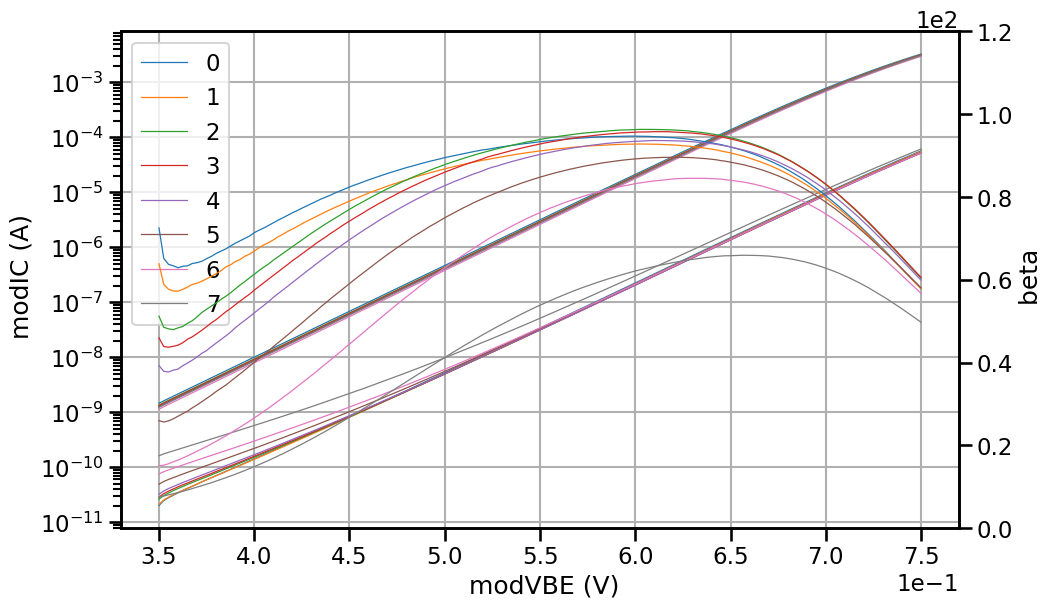

In [8]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"PNP GP [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[218])# 
        modvbe=np.array_split(df[' modVBE'], 1)
        modic=np.array_split(df[' modIC'], 1)
        modib=np.array_split(df[' modIB'], 1)
        beta=np.array_split(df[' beta'], 1)
    else:
        continue
    
    for r in range(len(modvbe)):
        ax1.semilogy(modvbe[r],modic[r],lw=0.9,c=colors[d],label=f'{d}')
        ax1.semilogy(modvbe[r],modib[r],lw=0.9,c=colors[d])
        ax1.legend()
        ax2.plot(modvbe[r],beta[r],lw=0.9,c=colors[d])
        
ax1.set_xlabel(f'{df.columns[8]} (V)')
ax1.set_ylabel(f'{df.columns[7]} (A)')#, color=color)   
ax2.set_ylabel(df.columns[5])#, color=color)  # we already handled the x-label with ax1
ax2.set_ylim(0,120)
plt.show()

## 07 PNP IC VCE

/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/home/arnaldi/work/tenv/lib/python3.11/s

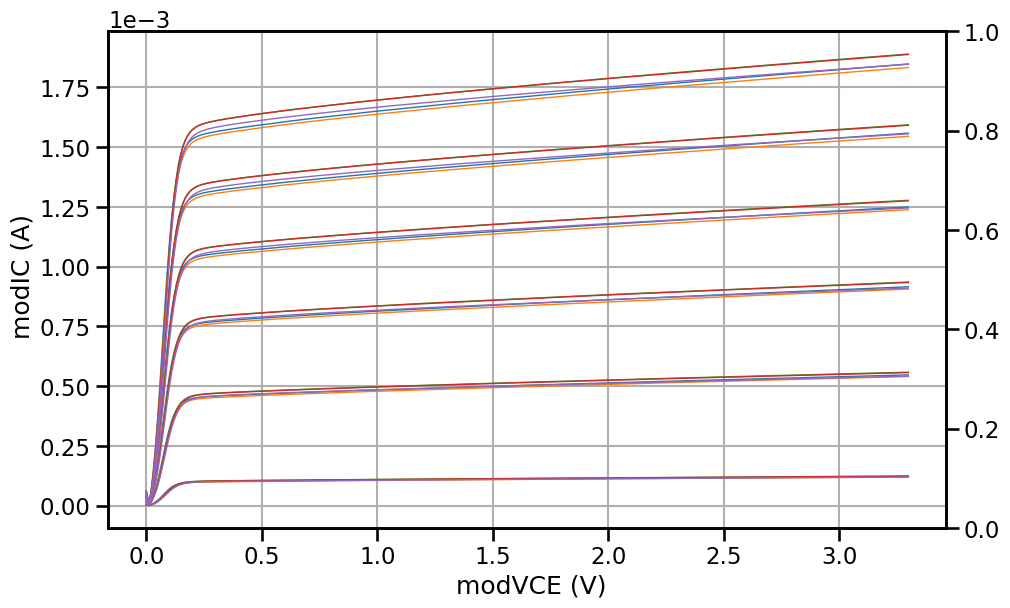

In [9]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=1 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"PNP IC VCE [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)
#print(files.index(1))
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[217])# 
        modvce=np.array_split(df[' modVCE'], 6)
        modic=np.array_split(df[' modIC'], 6)
    else:
        continue
        
    for r in range(len(modvce)):
        ax1.plot(modvce[r],modic[r],lw=1.0,c=colors[d],label=f'{d}')#label=f'{files.index(f)}')
        #ax1.legend(['d[::len(files/dirs)]'])
        #ax1.legend()
        #ax1.legend([c for c in np.arange(len(files))])
        #ax2.plot(vb[i],beta[i],lw=0.4)
        #print([c for c in np.arange(len(files))])
        
ax1.set_xlabel(f'{df.columns[5]} (V)')
ax1.set_ylabel(f'{df.columns[4]} (A)')#, color=color)   
#ax2.set_ylabel(df.columns[4])#, color=color)  # we already handled the x-label with ax1
plt.show()

## 08 NMOS1 ID VGS

In [ ]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NMOS1 ID VGS [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[216])# 
        vg=np.array_split(df[' VG'], 4)
        id=np.array_split(df[' ID'], 4)
    else:
        continue
        
    for r in range(len(vg)):
        ax1.semilogy(vg[r],id[r],lw=1.0,c=colors[d])
        #ax2.plot(vb[r],beta[r],lw=0.4)

ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[2]} (A)')
plt.show()

## 09 NMOS1 ID VDS

In [ ]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NMOS1 ID VDS [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[216])# 
        vd=np.array_split(df[' VD'], 6)
        id=np.array_split(df[' ID'], 6)
    else:
        continue
        
    for r in range(len(vd)):
        ax1.semilogy(vd[r],id[r],lw=0.9,c=colors[d],label=f'{d}')
        #ax1.legend()
        #ax2.plot(vb[r],beta[r],lw=0.4)

ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[2]} (A)')
plt.show()   

## 10 NMOS2 ID VGS

In [ ]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NMOS2 ID VGS [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[216])# 
        vg=np.array_split(df[' VG'], 4)
        id=np.array_split(df[' ID'], 4)
    else:
        continue
        
    for r in range(len(vg)):
        ax1.semilogy(vg[r],id[r],lw=0.9,c=colors[d])
        #ax2.plot(vb[r],beta[r],lw=0.4)

ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[2]} (A)')
plt.show()

## 11 NMOS2 ID VDS

In [ ]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"NMOS2 ID VDS [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[216])# 
        vd=np.array_split(df[' VD'], 6)
        id=np.array_split(df[' ID'], 6)
    else:
        continue
        
    for r in range(len(vd)):
        ax1.semilogy(vd[r],id[r],lw=0.9,c=colors[d])
        #ax2.plot(vb[r],beta[r],lw=0.4)

ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[2]} (A)')
plt.show()   

## 12 PMOS ID VGS

In [ ]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"PMOS ID VGS [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[219])# 
        vgs=np.array_split(df[' VGS'], 4)
        mid=np.array_split(df[' mID'], 4)
    else:
        continue
        
    for r in range(len(vgs)):
        ax1.semilogy(vgs[r],mid[r],lw=0.9,c=colors[d])
        #ax2.plot(vb[i],beta[i],lw=0.4,c=colors[i])

ax1.set_xlabel(f'{df.columns[5]} (V)')
ax1.set_ylabel(f'{df.columns[4]} (A)')
plt.show()

## 13 PMOS ID VDS

In [ ]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=6 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"PMOS ID VDS [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[219]) 
        vds=np.array_split(df[' VDS'], 6)
        mid=np.array_split(df[' mID'], 6)
    else:
        continue
        
    for r in range(len(vds)):
        ax1.semilogy(vds[r],mid[r],lw=0.9,c=colors[d])
        #ax2.plot(vb[r],beta[r],lw=0.4,c=colors[i])

ax1.set_xlabel(f'{df.columns[5]} (V)')
ax1.set_ylabel(f'{df.columns[4]} (A)')
plt.show()

## 14 C leakage

In [ ]:
files = []

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
#color = 'tab:red'

ax1.tick_params(axis='y')#, labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#color = 'tab:blue'

ax2.tick_params(axis='y')#, labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

board=3 #can be 0 to 5
files=[]
for di in dirs: # firt elem is the currend dir
    for file in sorted(os.listdir(di)):
        if file.startswith(f"C IV leak [step{di[18:]}_{board}"):
            files.append(file)
            #print(files)

#print(files)
colors=['C0','C1','C2','C3','C4','C5','C6','C7']
for d,f in enumerate(files):
    if path.exists(dirs[d] +'/'+ f):
        df=pd.read_csv(dirs[d] +'/'+ f,header=[214]) 
        vca=np.array_split(df[' Vca'], 1)
        ica=np.array_split(df[' Ica'], 1)
    else:
        continue
    for r in range(len(vca)):
        ax1.plot(vca[r],ica[r],lw=0.9,c=colors[d],label=f'{d}')
        ax1.legend()
        #ax2.plot(vb[i],beta[i],lw=0.9,c=colors[i])

ax1.set_xlabel(f'{df.columns[1]} (V)')
ax1.set_ylabel(f'{df.columns[2]} (A)')
plt.show()